In [ ]:
#!pip install gradio

In [80]:
import numpy as py
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

import gradio as gr

超参数调整

batch_size = 4
Epoch = 10
learning_rate = 0.001
num_classes = 10
精度 70.37%

batch_size = 16
Epoch = 10
learning_rate = 0.001
num_classes = 10
精度 63.6%

batch_size = 64
Epoch = 10
learning_rate = 0.001
num_classes = 10
精度 51.09%


batch_size = 16
Epoch = 10
learning_rate = 0.01
num_classes = 10
精度 74.13%

batch_size = 16
Epoch = 20
learning_rate = 0.01
num_classes = 10
精度 72.64%

四层网络

batch_size = 16
Epoch = 10
learning_rate = 0.01
num_classes = 10
精度 69.63%

batch_size = 16
Epoch = 10
learning_rate = 0.01
num_classes = 10
训练精度 91.66%
测试精度 68.33%（发生严重过拟合）

In [81]:
##################################
#超参数定义
batch_size = 64
Epoch = 20
learning_rate = 0.01
num_classes = 10

In [82]:
##################################
#输入数据处理   训练集 测试集
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                     download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                     shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                     shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [83]:
############################################
#训练集数据导入
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [ ]:
##############################
#网络定义
#

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=3, padding=1, stride=1)  #通道数翻倍
        self.bn1 = nn.BatchNorm2d(6)  #批量归一化
        self.pool1 = nn.MaxPool2d(kernel_size=3, padding=1, stride=2)   #最大池化 尺寸减半


        self.conv2 = nn.Conv2d(6, 12 , kernel_size=3, padding=1, stride=1)  #通道数翻倍
        self.bn2 = nn.BatchNorm2d(12)  #批量归一化
        self.pool2 = nn.MaxPool2d(kernel_size=3, padding=1, stride=2)

        self.conv3 = nn.Conv2d(12, 24, kernel_size=3, padding=1, stride=1)  #通道数翻倍
        self.bn3 = nn.BatchNorm2d(24)  #批量归一化
        self.pool3 = nn.MaxPool2d(kernel_size=3, padding=1, stride=1)   #取消尺寸减半

        self.linear1 = nn.Linear(8 * 8 * 24, 240)
        self.linear2 = nn.Linear(240, 60)
        self.linear3 = nn.Linear(60, num_classes)




    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x,1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x


net = Net()

In [84]:
#######################################################
#四层卷积

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=3, padding=1, stride=1)  #通道数翻倍
        self.bn1 = nn.BatchNorm2d(6)  #批量归一化
        self.pool1 = nn.MaxPool2d(kernel_size=3, padding=1, stride=2)   #最大池化 尺寸减半


        self.conv2 = nn.Conv2d(6, 12 , kernel_size=3, padding=1, stride=1)  #通道数翻倍
        self.bn2 = nn.BatchNorm2d(12)  #批量归一化
        self.pool2 = nn.MaxPool2d(kernel_size=3, padding=1, stride=2)

        self.conv3 = nn.Conv2d(12, 24, kernel_size=3, padding=1, stride=1)  #通道数翻倍
        self.bn3 = nn.BatchNorm2d(24)  #批量归一化
        self.pool3 = nn.MaxPool2d(kernel_size=3, padding=1, stride=1)   #取消尺寸减半


        self.conv4 = nn.Conv2d(24, 36, kernel_size=3, padding=1, stride=1)  #通道数翻倍
        self.bn4 = nn.BatchNorm2d(36)  #批量归一化
        self.pool4 = nn.MaxPool2d(kernel_size=3, padding=1, stride=1)   #取消尺寸减半

        self.linear1 = nn.Linear(8 * 8 * 36, 480)
        self.linear2 = nn.Linear(480, 60)
        self.linear3 = nn.Linear(60, num_classes)




    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))
        x = torch.flatten(x,1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

net = Net()

In [85]:
##########################
#定义损失函数 和 梯度计算

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [ ]:
#GPU训练
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
!nvidia-smi

In [ ]:
###########################
#训练过程

#GPU训练
#net.to(device)
net = net.cuda()
#存储损失与精度
loss_history = []
accuracy_history = []


for epoch in range(Epoch):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        #获取输入

        inputs, labels = data
        #inputs.to(device)
        inputs = inputs.cuda()
        #labels.to(device)
        labels = labels.cuda()
        #梯度置零
        optimizer.zero_grad()

        #前向计算
        outputs = net(inputs)
        #获取损失
        loss = criterion(outputs, labels)
        #计算梯度
        loss.backward()
        optimizer.step()
        #累计损失
        running_loss += loss.item()
        # 计算准确率
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()



        #每200次循环输出打印一次
        if i % 200 == 199:    # print every 2000 mini-batches
            print('Epoch: {}, Step: {}, Step_total: {}, Loss:{:.3f}'.format(epoch+1, i+1, len(trainloader), loss.item()))

    #计算各epoch中的平均损失值和准确率
    avg_loss = running_loss / len(trainloader)
    accuracy = 100.0 * correct_train / total_train
    #存储平均损失值和准确率
    loss_history.append(avg_loss)
    accuracy_history.append(accuracy)




print('Finished Training')


Epoch: 1, Step: 200, Step_total: 782, Loss:1.609
Epoch: 1, Step: 400, Step_total: 782, Loss:1.858
Epoch: 1, Step: 600, Step_total: 782, Loss:1.367


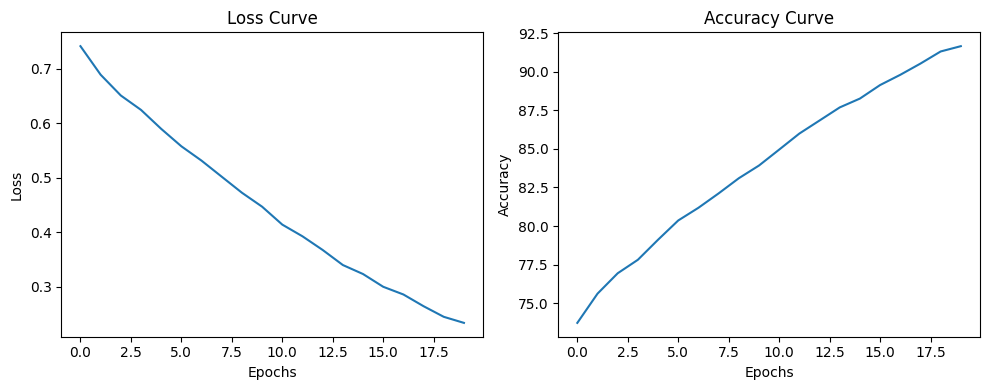

In [75]:
###############################
#绘制损失和准确率曲线

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(Epoch), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(range(Epoch), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()




In [79]:
##################################
#测试
net.eval()

correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


print('Accuracy of the net on the train iamges is {:.2f} %'.format(accuracy_history[-1]))

print('Accuracy of the net on the test iamges is {} %'.format(100 * correct / total))



Accuracy of the net on the train iamges is 91.66 %
Accuracy of the net on the test iamges is 68.33 %


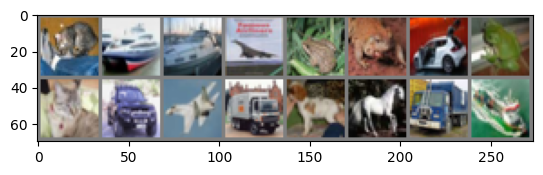

Truth Labels:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 
Predicted Labels:  cat   car   truck plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 


In [ ]:
############################
#可视化
dataiter = iter(testloader)
images, labels = next(dataiter)

#打印测试集照片
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))

#输出真实标签
print('Truth Labels: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#输出预测标签
images = images.cuda()
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted Labels: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))